In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
import scanpy as sc

gp.__version__


'1.0.5'

In [2]:
# reading data
sc_data = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/convert_sc_data.h5ad')
sc_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,cell,pANN,library,RNA_snn_res.0.5,seurat_clusters,collected_time,infer_age,infer_age_int,tissue_old,sub_cluster_number,celltype,tissue_update,germ_layer,subtype
index,,,,,,,,,,,,,,,,,,
CELL344_N2_1_1,V2R2209070002,10099.0,2392,1.089217,CELL344_N2_1_1,0.249983031290301,V2R2209070002,13.0,13,E12-14h,12.634391,13.0,CNS,5,glia,CNS,neuroectoderm,chiasm glia
CELL345_N1_1_1,V2R2209070002,3928.0,1049,0.712831,CELL345_N1_1_1,0.249983031290301,V2R2209070002,4.0,4,E12-14h,12.707846,13.0,hemolymph,2,plasmatocytes,hemolymph,mesoderm,plasmatocytes
CELL346_N3_1_1,V2R2209070002,7762.0,2243,0.979129,CELL346_N3_1_1,0.249983031290301,V2R2209070002,24.0,24,E12-14h,14.176962,14.0,midgut,2,entero-endocrine cells,midgut,endoderm,entero-endocrine cells (Mip+)
CELL347_N2_1_1,V2R2209070002,21023.0,2147,0.756315,CELL347_N2_1_1,0.249983031290301,V2R2209070002,10.0,10,E12-14h,16.564274,17.0,epidermis,1,epidermal epithelium,epidermis,ectoderm,epidermal epithelium
CELL348_N1_1_1,V2R2209070002,2809.0,617,1.637593,CELL348_N1_1_1,0.249983031290301,V2R2209070002,4.0,4,E12-14h,12.707846,13.0,hemolymph,2,plasmatocytes,hemolymph,mesoderm,plasmatocytes


In [3]:
sc_data.layers['counts'] = sc_data.X

In [4]:
# preprocessing but don't need normalization
sc.pp.log1p(sc_data)
sc_data.layers['lognorm'] = sc_data.X

In [5]:
sc_data.obs.groupby('celltype')['seurat_clusters'].value_counts()

celltype                    seurat_clusters
AMP/EE progenitors          24                  270
                            7                    62
                            22                    6
CNS primordium              40                  360
Malpighian tubule           19                 2692
                                               ... 
visceral muscle             8                     7
visceral muscle primordium  11                 1000
                            8                    36
                            30                   30
yolk                        39                  723
Name: seurat_clusters, Length: 250, dtype: int64

In [6]:
# extract some part data for tring
try_data = sc_data[sc_data.obs.seurat_clusters.isin(['40', '41'])].copy()
try_data

AnnData object with n_obs × n_vars = 1430 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'log1p'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'
    layers: 'counts', 'lognorm'

In [7]:
gp.get_library_name(organism="fly")

['Allele_LoF_Phenotypes_from_FlyBase_2017',
 'Allele_Phenotypes_from_FlyBase_2017',
 'Anatomy_AutoRIF',
 'Anatomy_AutoRIF_Predicted_zscore',
 'Anatomy_GeneRIF',
 'Anatomy_GeneRIF_Predicted_zscore',
 'Coexpression_Predicted_GO_Biological_Process_2018',
 'Coexpression_Predicted_GO_Cellular_Component_2018',
 'Coexpression_Predicted_GO_Molecular_Function_2018',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_GeneRIF',
 'GO_Biological_Process_GeneRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_GeneRIF',
 'GO_Cellular_Component_GeneRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF',
 'GO_Molecular_Function_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_GeneRIF',
 'GO_Molecular_Function_GeneRIF_Predicted_zscore',
 'Human_Disease_from_FlyBase_2017',
 

In [7]:
gene_sets = gp.get_library_name(organism="fly")

In [8]:
# biological process

import time
t1 = time.time()

res = gp.gsea(data=try_data.to_df().T,
              gene_sets='GO_Biological_Process_2018',
              cls=try_data.obs.seurat_clusters,
              permutation_num=1000,
              permutation_type='phenotype',
              outdir=None,
              method='s2n',
              threads=16)
t2=time.time()
print(t2-t1)

31.53553795814514


In [9]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,regulation of transcription from RNA polymeras...,-0.556443,-1.856059,0.002123,0.035398,0.017052,21/29,32.42%,AGO1;AGO2;MED26;MED19;BRWD3;HDAC1;MED21;MED7;M...
1,gsea,"positive regulation of transcription, DNA-temp...",-0.598698,-1.855426,0.004073,0.018631,0.017052,17/21,31.22%,AGO1;AGO2;MED19;RYBP;HDAC1;MED21;MED14;MED17;P...
2,gsea,positive regulation of transcription from RNA ...,-0.643818,-1.833289,0.008247,0.01801,0.023143,9/15,19.59%,AGO1;AGO2;MED19;HDAC1;MED21;SCAP;MED14;MED17;H...
3,gsea,"regulation of transcription, DNA-templated (GO...",-0.546251,-1.821823,0.008421,0.013973,0.024361,23/30,32.42%,MED26;RYBP;BRWD3;HDAC1;MED21;MED7;MED14;MED17;...
4,gsea,transcription from RNA polymerase II promoter ...,-0.57164,-1.783361,0.012474,0.014905,0.030451,17/20,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;PCID2;MED31...
5,gsea,transcription initiation from RNA polymerase I...,-0.579489,-1.741322,0.012552,0.019252,0.041413,15/17,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;MED31;MED24...
6,gsea,"DNA-templated transcription, initiation (GO:00...",-0.484274,-1.517928,0.096842,0.083572,0.149817,16/19,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;TAF1B;MED31...
7,gsea,positive regulation of gene expression (GO:001...,-0.467974,-1.395652,0.150628,0.135072,0.260658,12/16,31.22%,RYBP;HDAC1;MED14;MED17;PCID2;HDAC4;TAF1B;CTCF;...
8,gsea,organelle assembly (GO:0070925),0.31903,0.995765,0.472222,0.463663,0.592,16/16,96.91%,BBS1;IFT52;CHMP2B;IFT46;BBS9;BBS5;IFT20;HDAC6;...


In [10]:
res.ranking.shape

(13994,)

In [11]:
res.res2d.Term.iloc[0]

'regulation of transcription from RNA polymerase II promoter (GO:0006357)'

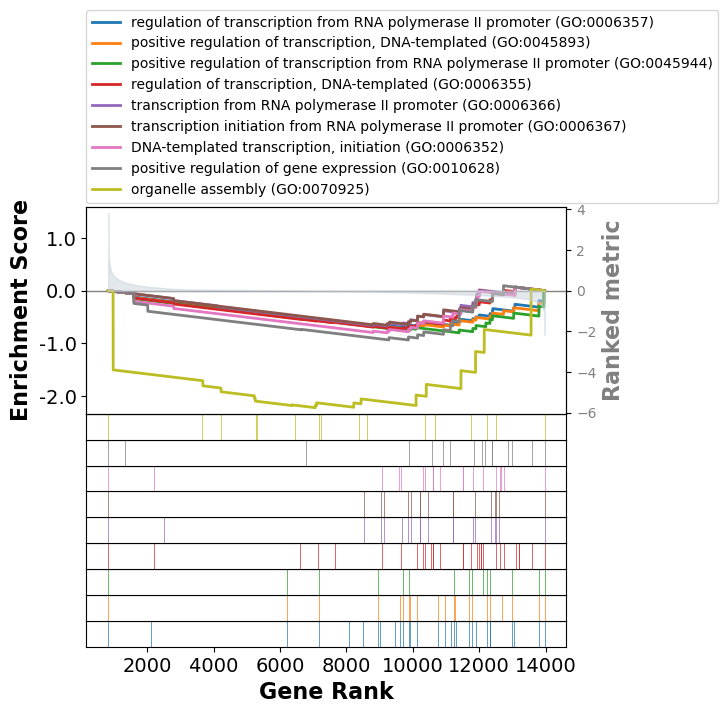

In [12]:
term = res.res2d.Term

axs = res.plot(terms=term)

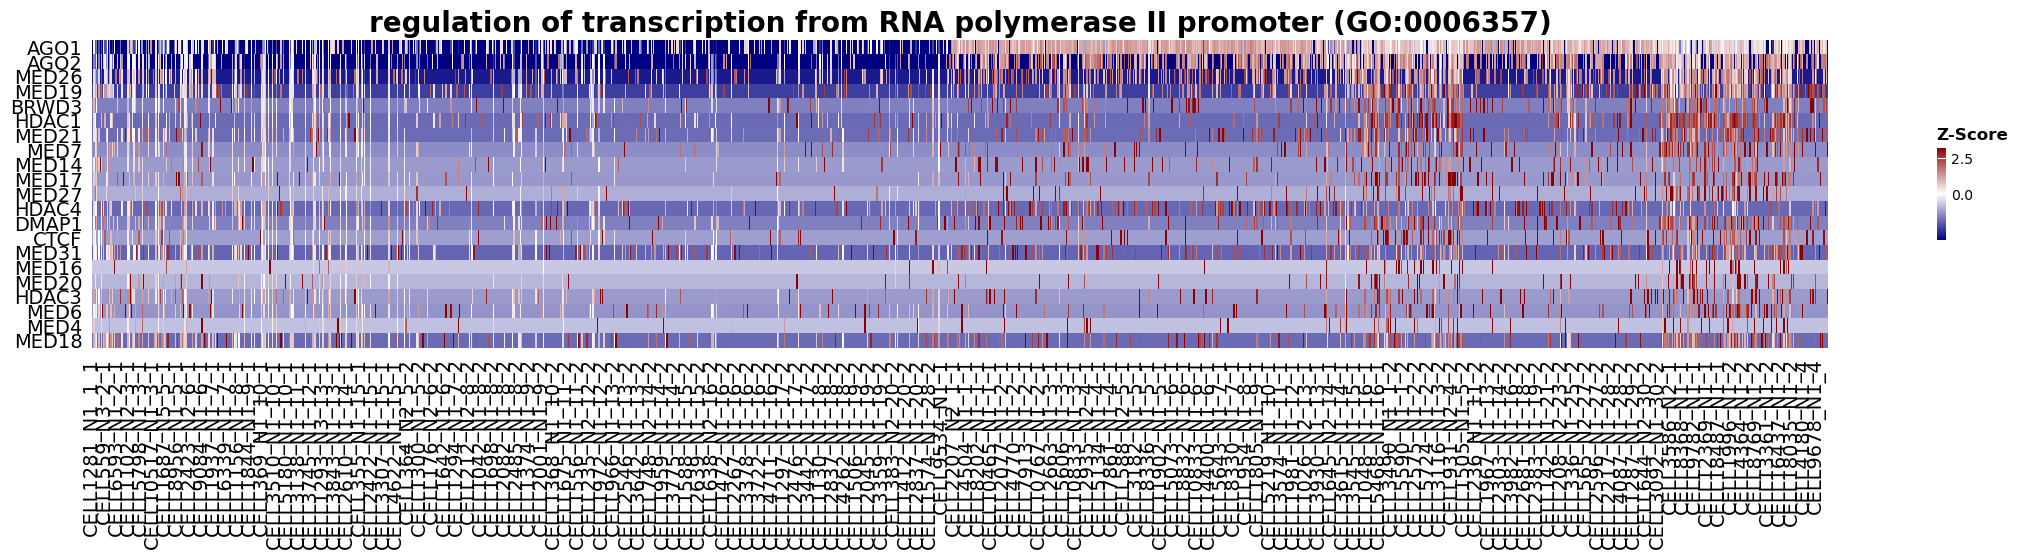

In [13]:
from gseapy import heatmap
genes = res.res2d.Lead_genes[0].split(';')
ax = heatmap(res.heatmat.loc[genes], z_score=0, title=term[0], figsize=(28,4))

# 2. DEG analysis

In [14]:
sc.tl.rank_genes_groups(try_data,
                        groupby='seurat_clusters',
                        use_raw=False,
                        layer='lognorm',
                        method='wilcoxon',
                        groups=['40'])

In [15]:
try_data.X.max()

2.1104722

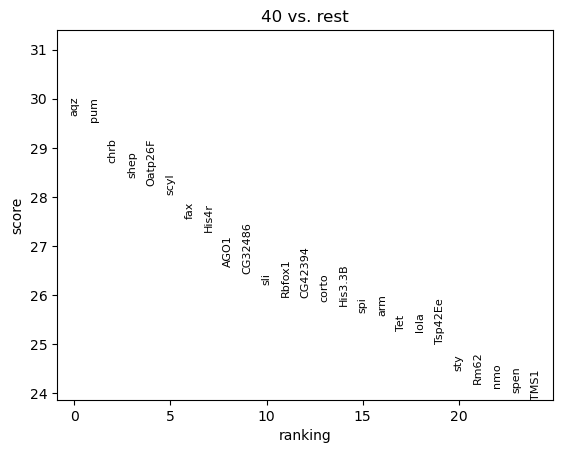

In [16]:
sc.pl.rank_genes_groups(try_data, n_genes=25, sharey=False)

In [17]:
result = try_data.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key:result[key][group]
     for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']}
)

In [18]:
degs

,40_names,40_scores,40_pvals,40_pvals_adj,40_logfoldchanges
0,aqz,29.659777,2.537134e-193,3.536131e-190,2.418362
1,pum,29.531246,1.143502e-191,1.195317e-188,4.016611
2,chrb,28.696030,4.276343e-181,2.750840e-178,3.136262
3,shep,28.388889,2.773169e-177,1.546042e-174,3.174566
4,Oatp26F,28.217325,3.584738e-175,1.816811e-172,10.431295
...,...,...,...,...,...
16720,ATPsynbeta,-31.508053,6.738294e-218,2.253959e-214,-1.496577
16721,CG6933,-31.697165,1.699906e-220,7.107732e-217,-8.863368
16722,Acbp4,-31.916056,1.598848e-223,8.913577e-220,-7.566109
16723,Pebp1,-32.075005,9.839727e-226,8.228472e-222,-7.119151


In [19]:
degs_sig = degs[degs['40_pvals_adj'] < 0.05]
degs_up = degs_sig[degs_sig['40_logfoldchanges'] > 0]
degs_down = degs_sig[degs_sig['40_logfoldchanges'] < 0]

In [20]:
print(degs_up.shape)
print(degs_down.shape)

(2542, 5)
(2288, 5)


In [21]:
enr_up = gp.enrichr(degs_up['40_names'],
                           gene_sets = 'GO_Biological_Process_2018',
                           organism='fly',
                           outdir='/mnt/c/Users/ouyangkang/Desktop/')

In [22]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

In [23]:
enr_up.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes
0,GO_Biological_Process_2018,axonogenesis,142/212,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.088299,189.102926,Frl;Nrg;Fmr1;ckn;ago;ssh;jing;lola;Vav;sick;pu...
1,GO_Biological_Process_2018,axon guidance,149/242,0.000000,0.000000,0.000000e+00,8.000000e-16,-1.061557,175.001777,Nrg;Fmr1;ckn;ago;jing;lola;Vav;RhoGAP100F;Oli;...
2,GO_Biological_Process_2018,imaginal disc-derived wing morphogenesis,137/240,0.000000,0.000000,1.900000e-15,1.260000e-12,-1.143595,157.936630,jumu;S6kII;aos;px;jing;lola;Rbfox1;sca;mor;pat...
3,GO_Biological_Process_2018,nervous system development,139/246,0.000000,0.000000,2.100000e-15,1.260000e-12,-1.093318,151.271300,Dronc;Fmr1;jing;rib;Vav;dmt;sick;alpha-Spec;Rb...
4,GO_Biological_Process_2018,"regulation of transcription, DNA-templated",241/623,0.000000,0.000000,7.689800e-11,1.684007e-08,-1.043553,148.876337,fs(1)h;hng2;hng3;aop;REPTOR-BP;lola;Oli;Rbfox1...
...,...,...,...,...,...,...,...,...,...,...
2313,GO_Biological_Process_2018,cholesterol transport,4/14,0.091634,0.142843,4.678974e-01,7.092663e-01,7.126088,-17.030996,CG5853;CG9663;CG17646;Atet
2314,GO_Biological_Process_2018,organelle fission,5/17,0.055028,0.090916,4.229908e-01,6.749017e-01,5.951593,-17.259122,Fis1;Pink1;gammaTub23C;shi;fog
2315,GO_Biological_Process_2018,cellular response to glucose starvation,3/6,0.030451,0.054255,2.429685e-01,4.805470e-01,5.170653,-18.054040,AMPKalpha;Sik3;Sik2
2316,GO_Biological_Process_2018,mitotic recombination,4/10,0.029003,0.053483,2.772959e-01,5.213074e-01,5.670977,-20.077313,Gen;spel1;rad50;CG3436


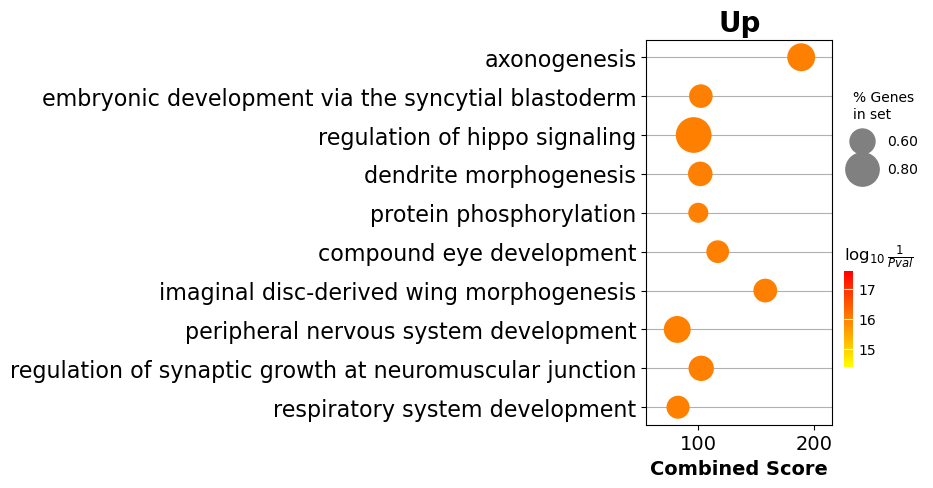

In [25]:
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r, cutoff=0.05)
plt.show()

In [28]:
enr_down = gp.enrichr(degs_down['40_names'],
                      gene_sets='GO_Biological_Process_2018',
                      organism='fly',
                      outdir='/mnt/c/Users/ouyangkang/Desktop/')


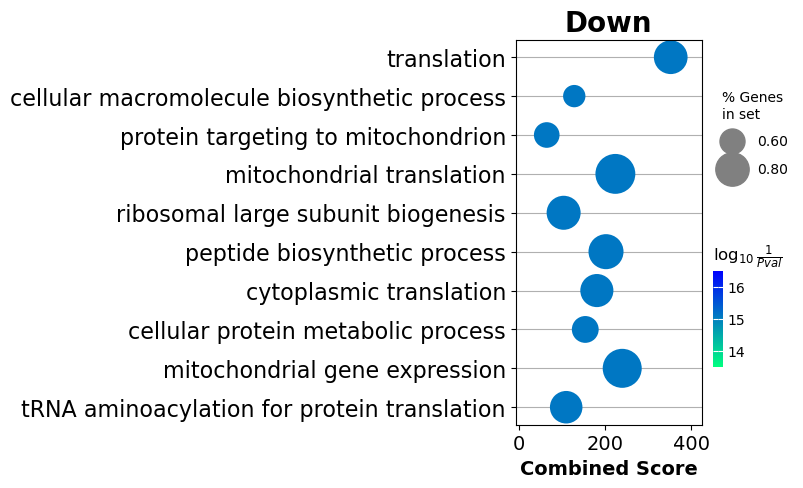

In [27]:
enr_down.res2d.Term = enr_down.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_down.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5,
           cutoff=0.05)
plt.show()

In [106]:
'''
玄学步骤，南无阿弥陀佛，地藏菩萨保佑
'''
enr_up.res2d['UP_DW'] = "UP"
enr_down.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d.iloc[:100], enr_down.res2d.iloc[:100]])

In [107]:
from gseapy.scipalette import SciPalette
sci = SciPalette
NbDr = sci.create_colormap()

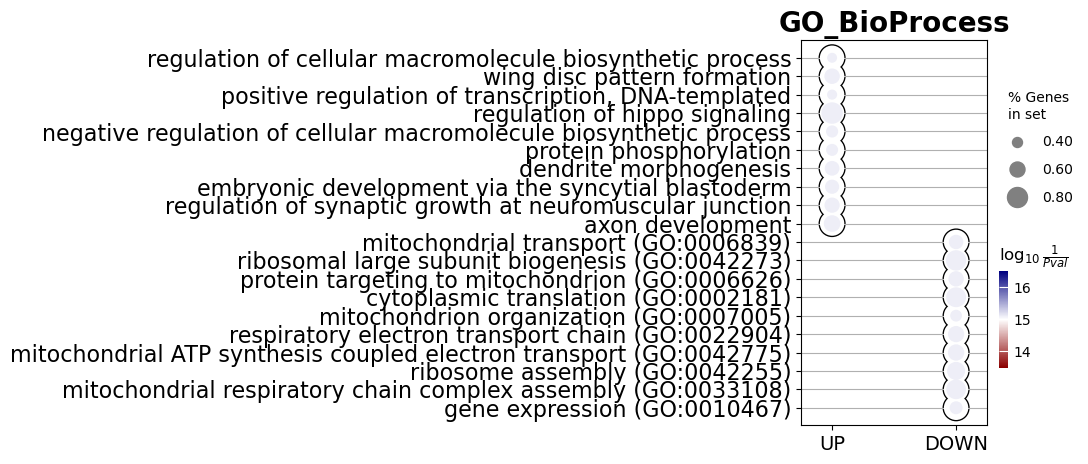

In [108]:
ax = gp.dotplot(enr_res,
                figsize=(3,5),
                x='UP_DW',
                x_order = ["UP","DOWN"],
                title="GO_BioProcess",
                cmap = NbDr.reversed(),
                size=3,
                show_ring=True)
ax.set_xlabel("")
plt.show()

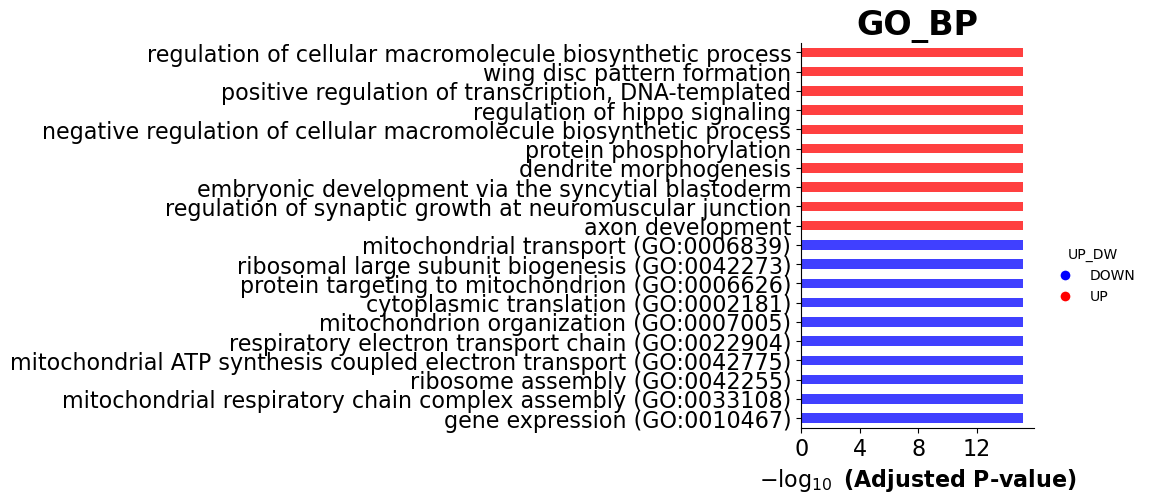

In [109]:
ax = gp.barplot(enr_res, figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'])

In [110]:
import networkx as nx

In [111]:
res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,regulation of transcription from RNA polymeras...,-0.556443,-1.856059,0.002123,0.035398,0.017052,21/29,32.42%,AGO1;AGO2;MED26;MED19;BRWD3;HDAC1;MED21;MED7;M...
1,gsea,"positive regulation of transcription, DNA-temp...",-0.598698,-1.855426,0.004073,0.018631,0.017052,17/21,31.22%,AGO1;AGO2;MED19;RYBP;HDAC1;MED21;MED14;MED17;P...
2,gsea,positive regulation of transcription from RNA ...,-0.643818,-1.833289,0.008247,0.01801,0.023143,9/15,19.59%,AGO1;AGO2;MED19;HDAC1;MED21;SCAP;MED14;MED17;H...
3,gsea,"regulation of transcription, DNA-templated (GO...",-0.546251,-1.821823,0.008421,0.013973,0.024361,23/30,32.42%,MED26;RYBP;BRWD3;HDAC1;MED21;MED7;MED14;MED17;...
4,gsea,transcription from RNA polymerase II promoter ...,-0.57164,-1.783361,0.012474,0.014905,0.030451,17/20,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;PCID2;MED31...


In [112]:
nodes, edges = gp.enrichment_map(res.res2d)

In [113]:
nodes.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,regulation of transcription from RNA polymeras...,-0.556443,-1.856059,0.002123,0.035398,0.017052,21/29,32.42%,AGO1;AGO2;MED26;MED19;BRWD3;HDAC1;MED21;MED7;M...,1.451018,0.724138
1,gsea,transcription initiation from RNA polymerase I...,-0.579489,-1.741322,0.012552,0.019252,0.041413,15/17,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;MED31;MED24...,1.715532,0.882353
2,gsea,"positive regulation of transcription, DNA-temp...",-0.598698,-1.855426,0.004073,0.018631,0.017052,17/21,31.22%,AGO1;AGO2;MED19;RYBP;HDAC1;MED21;MED14;MED17;P...,1.729772,0.809524
3,gsea,positive regulation of transcription from RNA ...,-0.643818,-1.833289,0.008247,0.01801,0.023143,9/15,19.59%,AGO1;AGO2;MED19;HDAC1;MED21;SCAP;MED14;MED17;H...,1.744495,0.600000
4,gsea,transcription from RNA polymerase II promoter ...,-0.57164,-1.783361,0.012474,0.014905,0.030451,17/20,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;PCID2;MED31...,1.826682,0.850000


In [114]:
edges.head()

,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes
0,0,1,regulation of transcription from RNA polymeras...,transcription initiation from RNA polymerase I...,0.384615,0.666667,"MED31,MED7,MED20,MED17,MED26,MED4,MED6,MED16,M..."
1,0,2,regulation of transcription from RNA polymeras...,"positive regulation of transcription, DNA-temp...",0.520000,0.764706,"MED16,HDAC1,MED21,CTCF,MED19,MED17,MED4,AGO2,H..."
2,0,3,regulation of transcription from RNA polymeras...,positive regulation of transcription from RNA ...,0.363636,0.888889,"HDAC1,MED21,MED19,MED17,AGO2,HDAC4,MED14,AGO1"
3,0,4,regulation of transcription from RNA polymeras...,transcription from RNA polymerase II promoter ...,0.407407,0.647059,"MED6,MED31,MED7,MED20,MED17,MED26,MED4,MED18,M..."
4,0,5,regulation of transcription from RNA polymeras...,"regulation of transcription, DNA-templated (GO...",0.692308,0.857143,"MED6,MED31,HDAC1,MED7,CTCF,MED21,MED20,MED26,M..."


In [115]:
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

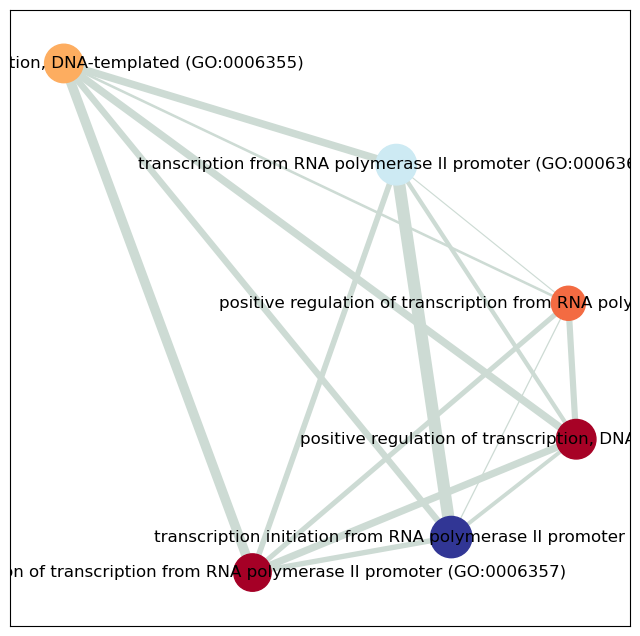

In [116]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()